# Covid-19 Data Mining Project

## Overview of Python Packages Used 
* matplotlib: data visualization
* numpy & pandas: csv data frame
* Jupyter Lab and various dependencies

[Link to full requirements text file](./requirements.txt)

## Development Process
In order to speed up the initial set up process and solve the problem of "it works on my machine". We used virual environments during development of our scripts. The developmetn environment for our project can be set up by running the following commands on a Windows machine.

```
cd path/to/project
python -m venv env
./env/Scripts/Activate.ps1
pip install -r requirements.txt
```

## Data Visualization Script
The purpose of this visualization is to show the direct relationship between population density and covid cases in all the counties of California.

### Attributes of Interest
* Population of a perticular county
* Covid case count per county
* Never rarely percentage sum

[csv of Covid-19 and mask data from NY Times](https://github.com/nytimes/covid-19-data )

[csv of California populations by counties from WPR](https://worldpopulationreview.com/us-counties/states/ca)

<IPython.core.display.Javascript object>


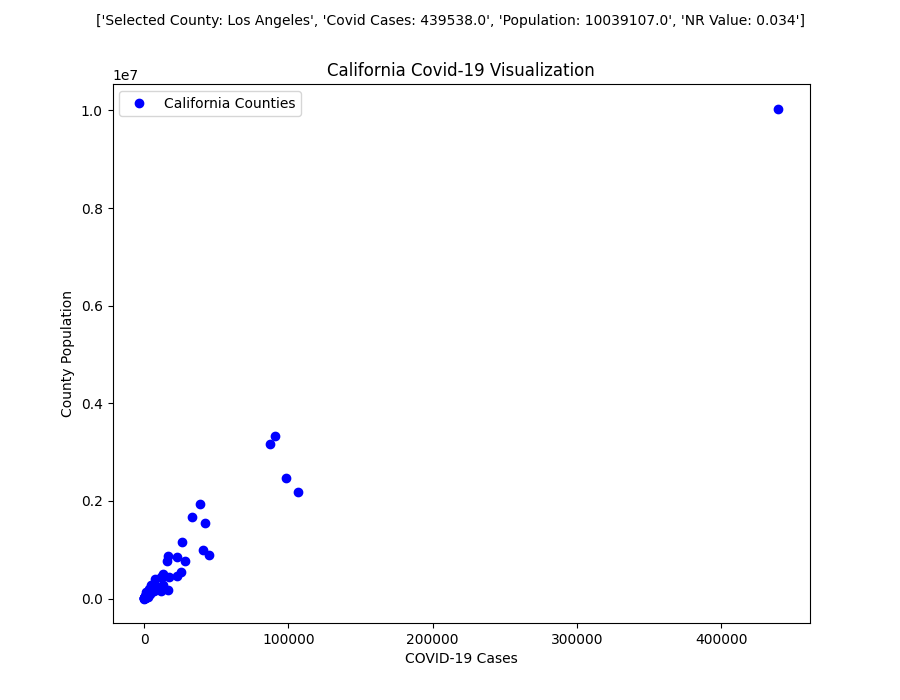

9

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

df = pd.read_csv("data/RawData.csv")

fig, ax1 = plt.subplots()
fig.set_size_inches(7, 5)
plt.title("California Covid-19 Visualization")
text=plt.suptitle("[plot is not selected]", fontsize=10)

def on_plot_pick(event):
    ind = event.ind
    ind = ind[0]
    tx = []
    tx.append('Selected County: '+ str(df["county"][ind]))
    tx.append('Covid Cases: ' + str(df["cases"][ind]))
    tx.append('Population: ' + str(df["population"][ind]))
    tx.append('NR Value: ' + str(df["nr sum"][ind]))
    text.set_text(tx)
    
ax1.plot(df["cases"], df["population"], 'bo', label="California Counties", picker=True)
plt.xlabel("COVID-19 Cases")
plt.ylabel("County Population")
plt.legend(loc="upper left")
fig.canvas.mpl_connect('pick_event', on_plot_pick)


## Multi-Variable Analysis
The following script calculates the correlation percentage between county population, Covid-19 cases and the percentage of poll voters that either said they never wear masks or rarely wear masks.


In [ ]:
# Get pairwise correlation coefficients
cor = df.corr()

# Independent variables
x = 'population'
y = 'nr sum'

# Dependent variable
z = 'cases'

# pairwise correlations
xz = cor.loc[x, z]
yz = cor.loc[y, z]
xy = cor.loc[x, y]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

# Output results of r^2 and the adjacent r^2
print(R2, R2_adj)

The above results show that the sum of never and rarely percentages and county populations are almost 96% correlated with the amount of Covid-19 cases. We've derived these results using built in functions of the pandas library and our custom implementation of the multiple correlation coefficient `Rxyz`.